# JL netCDF example

In [16]:
import Glob
import NetCDF
import PyPlot
import FTPClient

**Import netCDF data**

In [3]:
ftp = FTPClient.FTP("ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.derived/")
ftp_filename = "surface/slp.mon.mean.nc";

# download to a local path
filename = "/glade/u/home/ksha/WORKSPACE/JL_Collection/data/slp.mon.mean.nc";
FTPClient.download(ftp, ftp_filename, filename);
FTPClient.close(ftp)

**Browse nc file information**

In [4]:
NetCDF.ncinfo(filename)


##### NetCDF File #####

/glade/u/home/ksha/WORKSPACE/JL_Collection/data/slp.mon.mean.nc

##### Dimensions #####

Name                                                Length                    
--------------------------------------------------------------------------------
lat                                                 73                        
time                                                UNLIMITED (868 currently) 
lon                                                 144                       

##### Variables #####

Name                            Type            Dimensions                      
--------------------------------------------------------------------------------
lat                             FLOAT           lat                             
slp                             FLOAT           lon lat time                    
time                            DOUBLE          time                            
lon                             FLOAT           lon        

In [6]:
# get "lat", "lon" and "slp"
lat = NetCDF.ncread(filename, "lat");
lon = NetCDF.ncread(filename, "lon");
slp = NetCDF.ncread(filename, "slp");

In [20]:
size(slp[:, :, 1])

(144, 73)

In [25]:
grid_lon = [i for i in lon, j in lat];
grid_lat = [j for i in lon, j in lat];

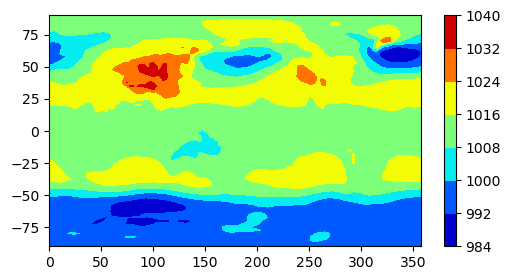

PyObject <matplotlib.colorbar.Colorbar object at 0x2acdd5925d50>

In [29]:
fig = PyPlot.figure(figsize=(6, 3));
ax = fig.gca();
CS = ax.contourf(grid_lon, grid_lat, slp[:, :, 1], cmap=PyPlot.ColorMap("jet"));
PyPlot.colorbar(CS)

**Write netCDF4** with C-like API

In [36]:
writename = "/glade/u/home/ksha/WORKSPACE/JL_Collection/data/test.nc";
nc_attributes = Dict("creator" => "Kyle", "create_date" => "2020 May");

In [51]:
x_axis = NetCDF.NcDim("lon", 144, values=lon)
y_axis = NetCDF.NcDim("lat", 73, values=lat)
time = NetCDF.NcDim("time", 0, unlimited=true)

var1 = NetCDF.NcVar("slp", [x_axis, y_axis, time])
var2 = NetCDF.NcVar("slp_duplicate", [x_axis, y_axis, time])

ncio = NetCDF.create(writename, [var1, var2], gatts=nc_attributes) # default mode = nc4
NetCDF.putvar(ncio, "slp", slp)
NetCDF.putvar(ncio, "slp_duplicate", slp)
NetCDF.close(ncio)

Base.StackTraces.StackFrame[close(::NetCDF.NcFile) at NetCDF.jl:871, top-level scope at In[51]:12, eval at boot.jl:331 [inlined], softscope_include_string(::Module, ::String, ::String) at SoftGlobalScope.jl:218, execute_request(::ZMQ.Socket, ::IJulia.Msg) at execute_request.jl:67, #invokelatest#1 at essentials.jl:712 [inlined], invokelatest at essentials.jl:711 [inlined], eventloop(::ZMQ.Socket) at eventloop.jl:8, (::IJulia.var"#15#18")() at task.jl:358]


┌ Warning: NetCDF.close is deprecated, because closing files is done with finalizers from now on. 
└ @ NetCDF /glade/u/home/ksha/.julia/packages/NetCDF/RrTZz/src/NetCDF.jl:872


In [52]:
NetCDF.ncinfo(writename)


##### NetCDF File #####

/glade/u/home/ksha/WORKSPACE/JL_Collection/data/test.nc

##### Dimensions #####

Name                                                Length                    
--------------------------------------------------------------------------------
lat                                                 73                        
time                                                UNLIMITED (868 currently) 
lon                                                 144                       

##### Variables #####

Name                            Type            Dimensions                      
--------------------------------------------------------------------------------
lat                             FLOAT           lat                             
slp                             DOUBLE          lon lat time                    
slp_duplicate                   DOUBLE          lon lat time                    
lon                             FLOAT           lon                